# Model based on sentence features
***
Libraries:

In [0]:
!pip install transformers
import pandas as pd
from transformers import *
import numpy as np
from sklearn.model_selection import train_test_split


## Data preprocessing 
- reading data 
- change columns names 
- drop NaN rows 
- fill others NaN values by special sign

In [7]:
df = pd.read_excel('dataset.xlsx')
df.reset_index()
df = df.iloc[:,[2,3,5,8,9,11,12,13]]
df.columns = ["verb_veridial_positive",
              "verb_veridical_negative",
              "semantic_characteristic",
              "standford_signature_for_that",
              "standford_signature_for_to",
              "complementizer",
              "verb_tense",
              "semantic_relation"]
df.dropna(inplace=True, axis = 0, how = 'all')
df.fillna(axis = 0, inplace =True, value="none")
df.head()

,verb_veridial_positive,verb_veridical_negative,semantic_characteristic,standford_signature_for_that,standford_signature_for_to,complementizer,verb_tense,semantic_relation
0,o,o,epistemiczny,o/o,none,that,present,N
1,o,o,emotywny,none,none,that,present,N
2,o,o,mówienia,nie ma,none,that,present,N
3,o,o,epistemiczny,o/o,none,that,present,N
4,o,o,epistemiczny,nie ma,none,that,past,E


### cleaning data by deleting uncertainty - simplification 


In [9]:
#verb veridical positive cleaning
df.verb_veridial_positive = df.verb_veridial_positive.apply(lambda x: '+' if '+' in x else x)
df.verb_veridial_positive = df.verb_veridial_positive.apply(lambda x: '-' if '-' in x else x)
df.verb_veridial_positive = df.verb_veridial_positive.apply(lambda x: 'o' if 'o' in x else x)
df.verb_veridial_positive = df.verb_veridial_positive.apply(lambda x: '?' if '?' in x else x)

#verb veridical negative cleaning
df.verb_veridical_negative = df.verb_veridical_negative.apply(lambda x: '+' if '+' in x else x)
df.verb_veridical_negative = df.verb_veridical_negative.apply(lambda x: 'o' if 'o' in x else x)
df.verb_veridical_negative = df.verb_veridical_negative.apply(lambda x: '-' if '-' in x else x)
df.verb_veridical_negative = df.verb_veridical_negative.apply(lambda x: '1' if '1' in x else x)
df.verb_veridical_negative = df.verb_veridical_negative.apply(lambda x: '?' if '?' in x else x)

#df.semantic_characteristic.unique() cleaning not needed
#df.standford_signature_for_that.unique() cleaning not needed
#df.standford_signature_for_to.unique() cleaning not needed
#df.complementizer.unique() cleaning not needed

#df.verb_tense cleaning
df.verb_tense = df.verb_tense.apply(lambda x: 'present' if 'present' in x else x)
df.verb_tense = df.verb_tense.apply(lambda x: 'past' if 'past' in x else x)
df.verb_tense = df.verb_tense.apply(lambda x: 'future' if 'future' in x else x)
df.verb_tense = df.verb_tense.apply(lambda x: 'none' if 'none' in x else x)
df.verb_tense = df.verb_tense.apply(lambda x: '?' if '?' in x else x)

df.head()

,verb_veridial_positive,verb_veridical_negative,semantic_characteristic,standford_signature_for_that,standford_signature_for_to,complementizer,verb_tense,semantic_relation
0,o,o,epistemiczny,o/o,none,that,present,N
1,o,o,emotywny,none,none,that,present,N
2,o,o,mówienia,nie ma,none,that,present,N
3,o,o,epistemiczny,o/o,none,that,present,N
4,o,o,epistemiczny,nie ma,none,that,past,E


### vectorize data and split to features and target

In [11]:
df = pd.get_dummies(df)

X_train = df.iloc[:,1:-5]
y_train = df.iloc[:,-4:]

X_train.head()

,verb_veridial_positive_-,verb_veridial_positive_?,verb_veridial_positive_o,verb_veridical_negative_+,verb_veridical_negative_-,verb_veridical_negative_1,verb_veridical_negative_?,verb_veridical_negative_o,semantic_characteristic_czynnościowy,semantic_characteristic_dowodzenia,semantic_characteristic_emotywny,semantic_characteristic_epistemiczno-percepcyjny,semantic_characteristic_epistemiczny,semantic_characteristic_liczenia,semantic_characteristic_mówienia,semantic_characteristic_mówieniowo-pamięciowy,semantic_characteristic_odkrycia,semantic_characteristic_określające dostęp do wiedzy,semantic_characteristic_ontyczny,semantic_characteristic_pamięciowy,semantic_characteristic_percepcyjno-mówieniowy,semantic_characteristic_percepcyjny,semantic_characteristic_pokazywania,semantic_characteristic_wnioskowania,semantic_characteristic_wynikania,semantic_characteristic_zdarzeniowy,"standford_signature_for_that_""+/+""","standford_signature_for_that_""+/o""",standford_signature_for_that_nie ma,standford_signature_for_that_none,standford_signature_for_that_o/+,standford_signature_for_that_o/o,standford_signature_for_to_none,standford_signature_for_to_o/o,complementizer_that,complementizer_to,verb_tense_?,verb_tense_future,verb_tense_none,verb_tense_past
0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1


***
# Keras model building

In [0]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

In [14]:
model = tf.keras.Sequential()

#get number of columns in training data
n_cols = X_train.shape[1]

#add model layers
model.add(Dense(100, activation=keras.layers.LeakyReLU(alpha=0.3), input_shape=(n_cols,)))
model.add(Dense(250, activation='relu'))
model.add(Dense(500, activation=keras.layers.LeakyReLU(alpha=0.3)))
model.add(Dense(250, activation='selu'))
model.add(Dense(100, activation=keras.layers.LeakyReLU(alpha=0.3)))
model.add(Dense(50, activation=keras.layers.LeakyReLU(alpha=0.3)))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer = 'adam', loss="categorical_crossentropy", metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 100)               4100      
_________________________________________________________________
dense_8 (Dense)              (None, 250)               25250     
_________________________________________________________________
dense_9 (Dense)              (None, 500)               125500    
_________________________________________________________________
dense_10 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_11 (Dense)             (None, 100)               25100     
_________________________________________________________________
dense_12 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_13 (Dense)             (None, 4)                

## Training model on prepared data

In [15]:
#train model
history = model.fit(X_train, y_train, validation_split=0.4, epochs=30)

Epoch 1/30
42/42 [==============================] - 0s 11ms/step - loss: 0.6012 - accuracy: 0.8390 - val_loss: 0.5157 - val_accuracy: 0.8554
Epoch 2/30
42/42 [==============================] - 0s 7ms/step - loss: 0.4232 - accuracy: 0.8853 - val_loss: 0.4860 - val_accuracy: 0.8679
Epoch 3/30
42/42 [==============================] - 0s 7ms/step - loss: 0.3811 - accuracy: 0.8945 - val_loss: 0.4626 - val_accuracy: 0.8679
Epoch 4/30
42/42 [==============================] - 0s 7ms/step - loss: 0.3853 - accuracy: 0.8891 - val_loss: 0.4677 - val_accuracy: 0.8690
Epoch 5/30
42/42 [==============================] - 0s 7ms/step - loss: 0.3733 - accuracy: 0.8907 - val_loss: 0.5096 - val_accuracy: 0.8508
Epoch 6/30
42/42 [==============================] - 0s 7ms/step - loss: 0.3603 - accuracy: 0.9013 - val_loss: 0.4551 - val_accuracy: 0.8724
Epoch 7/30
42/42 [==============================] - 0s 7ms/step - loss: 0.3532 - accuracy: 0.8975 - val_loss: 0.4704 - val_accuracy: 0.8679
Epoch 8/30
42/42 [=

## plot with train and test accuracy

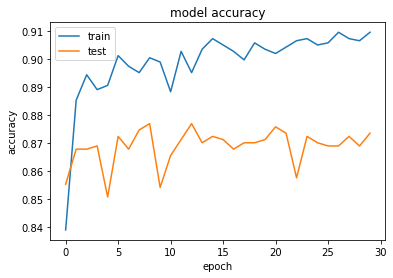

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()